In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data ingestion

In [2]:
## Dta ingestion step
data = pd.read_csv("data/gemstone.csv")

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [5]:
data.shape

(193573, 11)

In [6]:
## No missing Valueas in Data set
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
## No Duplicet value in data
data.duplicated().sum()

0

In [9]:
## Drop Id colum not use full
data.drop("id",axis=1,inplace=True)

In [10]:
## saprate numerical and categorical features
categorical_features = data.dtypes[data.dtypes == "object"].index
numerical_features = data.dtypes[data.dtypes != "object"].index
print(categorical_features)
print(numerical_features)

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [11]:
data[categorical_features].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [12]:
## All value count od catigorical data
for i in categorical_features:
    print(i,data[i].value_counts())
    print("="*60)

cut cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
color color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
clarity clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


In [13]:
# All unique value fo all catigeogrical features
for i in categorical_features:
    print(i,data[i].unique())
    print("="*60)

cut ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
color ['F' 'J' 'G' 'E' 'D' 'H' 'I']
clarity ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


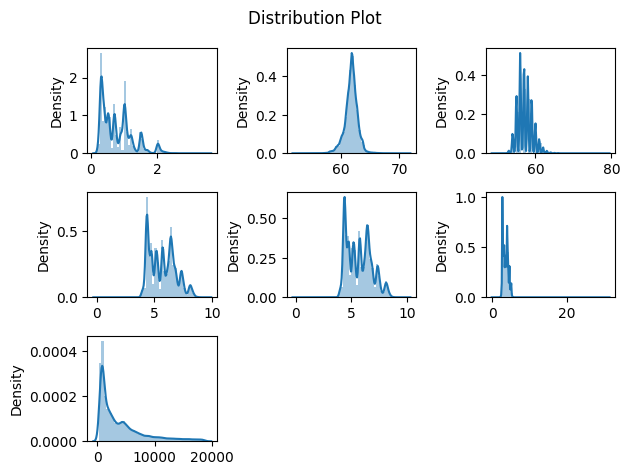

In [14]:
try:
    plt.suptitle("Distribution Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

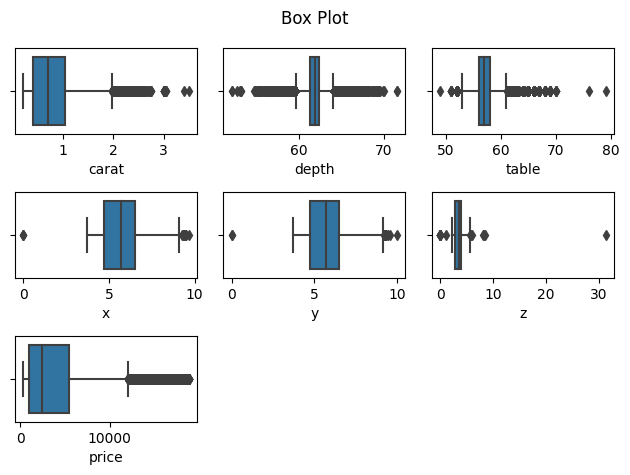

In [15]:
try:
    plt.suptitle("Box Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

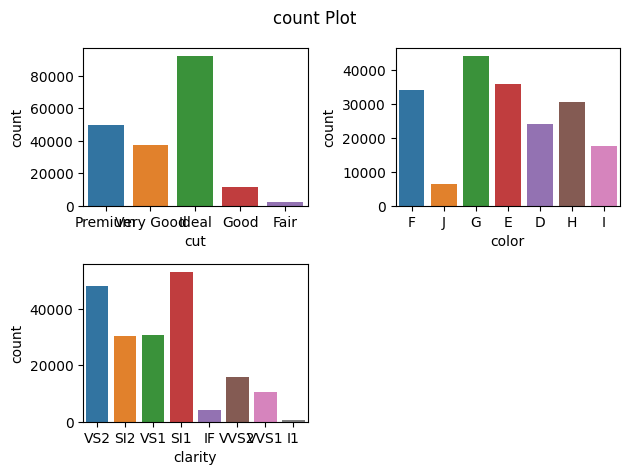

In [16]:
try:
    plt.suptitle("count Plot")
    for i in range(0,len(categorical_features)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=data[categorical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: >

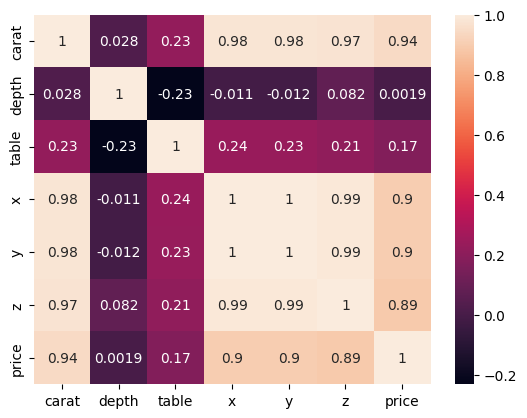

In [17]:
## Correlation
sns.heatmap(data[numerical_features].corr(),annot=True)

In [18]:
# Drop wnwanted collums
#We will not Executi this
#data.drop(["x","y","z"],axis=1,inplace=True)

In [19]:
#take sample to pairplot data 
sample = data.sample(10000)

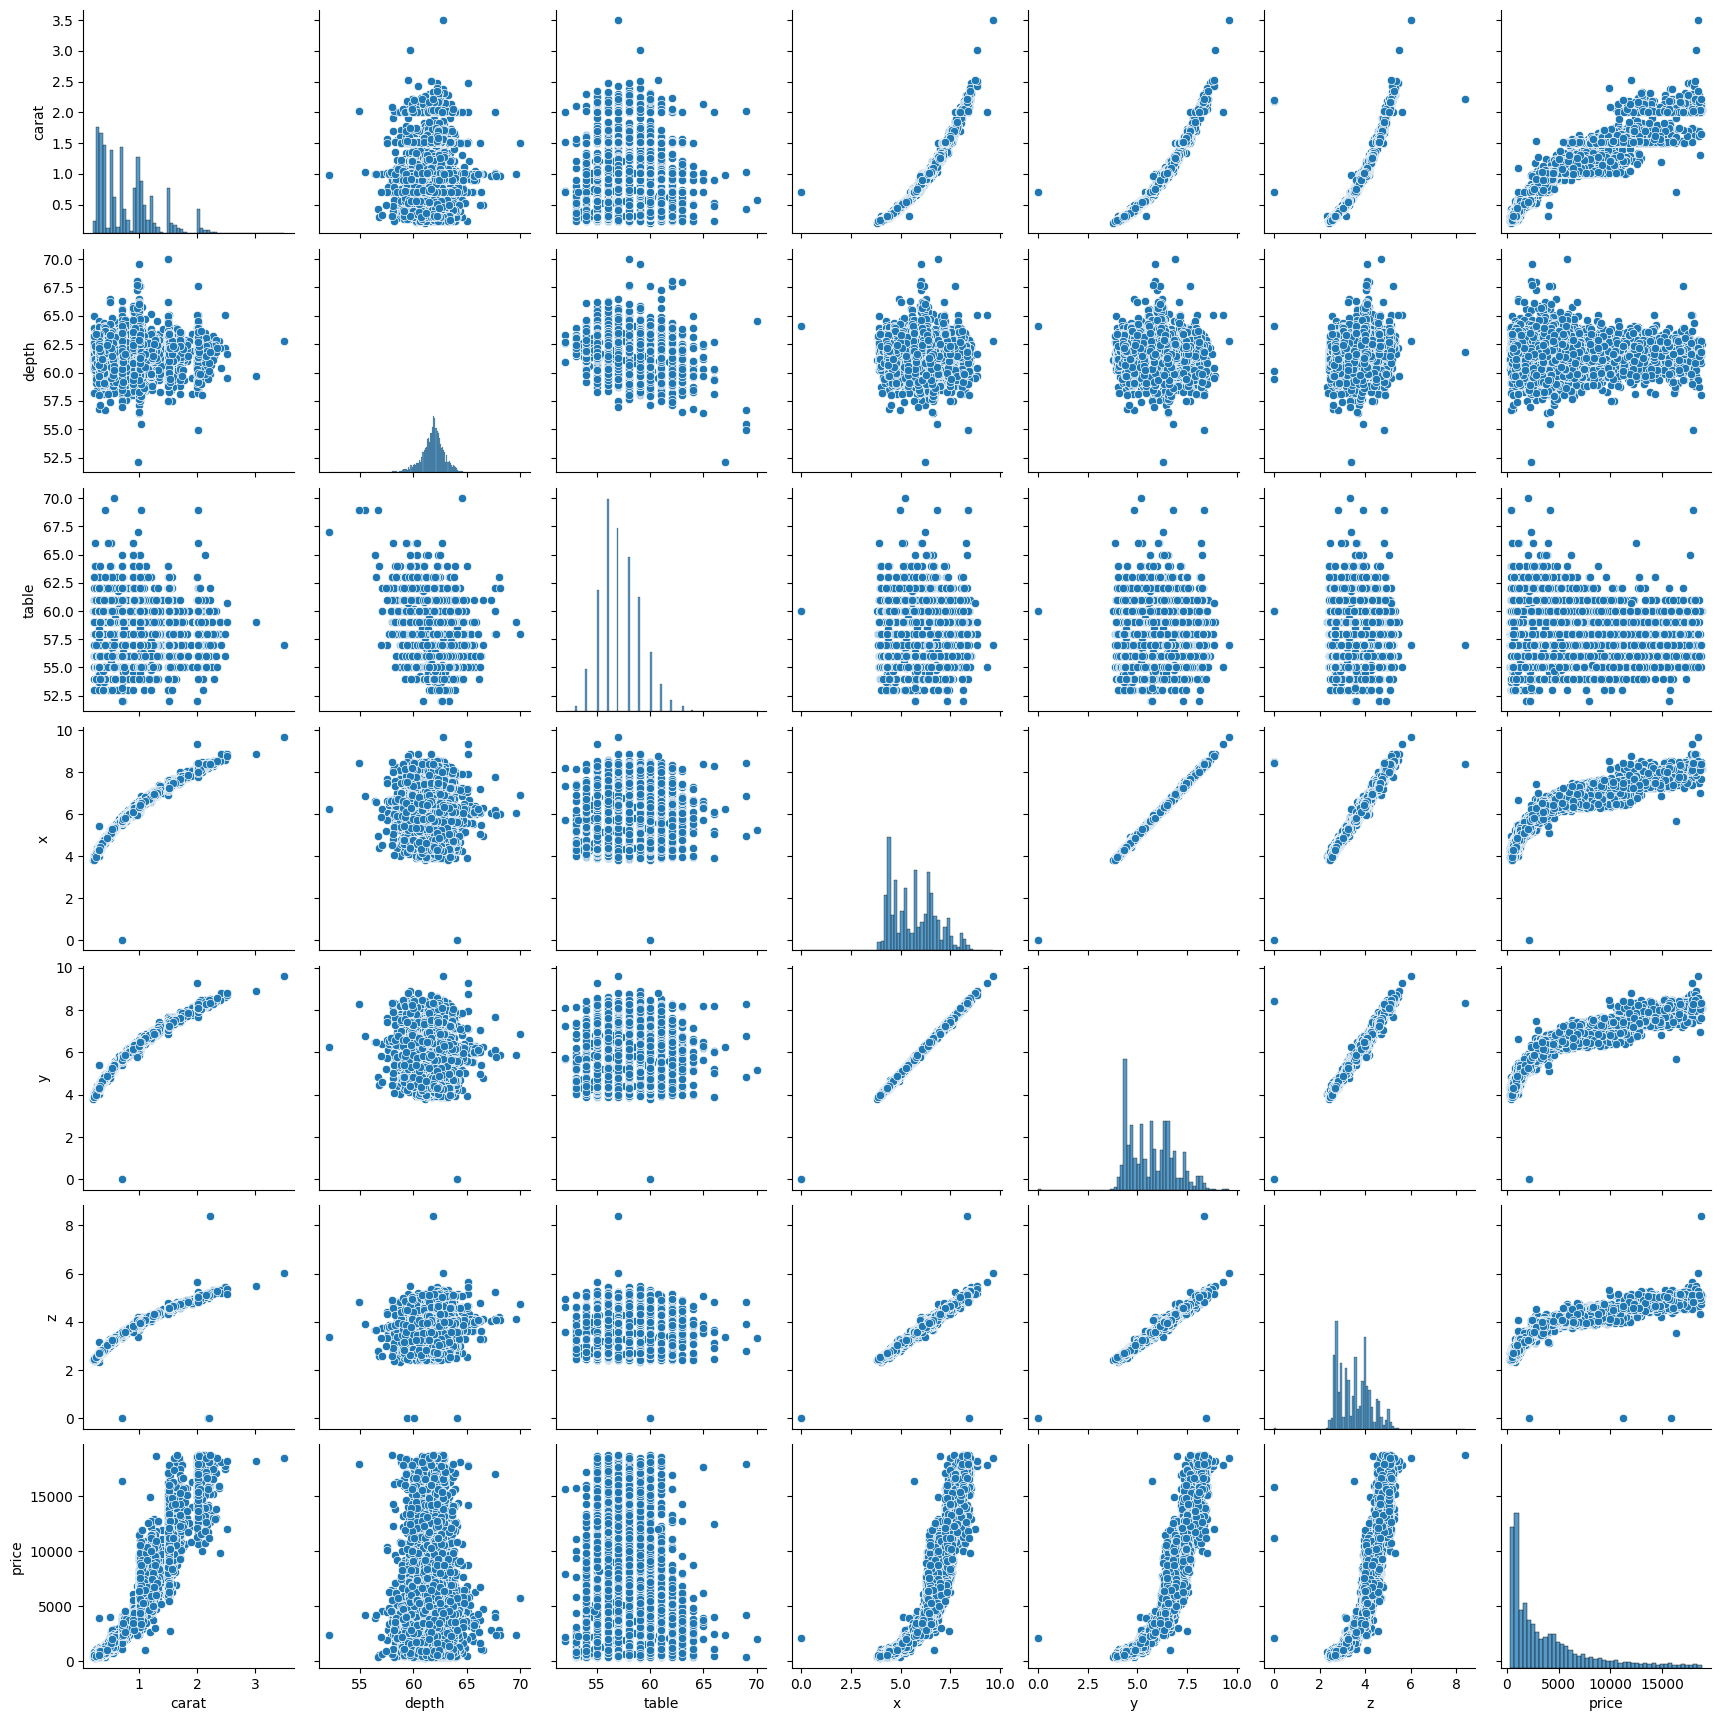

In [20]:
sns.pairplot(sample)

In [21]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [22]:
data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [23]:
cut_map = {'Premium':4, 'Very Good':3, 'Ideal':5, 'Good':2, 'Fair':1}

In [24]:
data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [25]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}


In [26]:
data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [27]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [28]:
## convert in to numerical value 
data["cut"] = data["cut"].map(cut_map)
data["clarity"] = data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)

In [29]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
